# Smile detection experiment on the CelebA dataset
Import necessary packages

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

Inspect images

(218, 178, 3)


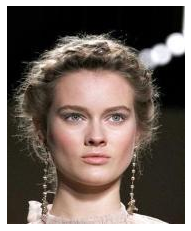

In [2]:
sample_image = keras.utils.load_img("images/020289.jpg")
img_array = keras.utils.img_to_array(sample_image)
print(img_array.shape)
plt.axis('off')
plt.imshow(img_array.astype('uint8'))
plt.show()

Inspect list of attributes

In [3]:
attributes = pd.read_csv("list_attr_celeba.csv")
attributes.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


Create a model to detect when people are smiling. First extract only the image_id and Smiling attribute from the DataFrame

In [4]:
smile_data = attributes[['image_id', 'Smiling']]
smile_data.head()

,image_id,Smiling
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


In [5]:
smile_data.loc[smile_data.Smiling == 1]

,image_id,Smiling
0,000001.jpg,1
1,000002.jpg,1
8,000009.jpg,1
10,000011.jpg,1
11,000012.jpg,1
...,...,...
202591,202592.jpg,1
202592,202593.jpg,1
202595,202596.jpg,1
202596,202597.jpg,1


97,669 images are of smiling celebrities so the dataset is more or less balanced and accuracy will be an appropiate measure of success.
Now let's split the data into training, test and validation sets and organize it in different folders. 60% of the data will be used for training, and 20% each for testing and validation. Since there are enough data hold-out validation will be used and since it's not ordered I won't shuffle it before splitting


In [6]:
import os, shutil, pathlib
source_dir = pathlib.Path("images")
target_dir = pathlib.Path("smiling_data")


In [ ]:
for subset in ['train', 'test', 'validation']:
    for category in ['smiling', 'not_smiling']:
        dir = target_dir / subset / category
        os.makedirs(dir)
i = 0
for row in smile_data.values:
    fname = row[0]
    smiling = row[1]
    if i <= 121559: # 60%
        if smiling == 1:
            shutil.copyfile(src=source_dir / fname, dst=target_dir / "train" / "smiling" / fname)
        else:
            shutil.copyfile(src=source_dir / fname, dst=target_dir / "train" / "not_smiling" / fname)
    elif i <= 162079: # 80%
        if smiling == 1:
            shutil.copyfile(src=source_dir / fname, dst=target_dir / "test" / "smiling" / fname)
        else:
            shutil.copyfile(src=source_dir / fname, dst=target_dir / "test" / "not_smiling" / fname)
    else:
        if smiling == 1:
            shutil.copyfile(src=source_dir / fname, dst=target_dir / "validation" / "smiling" / fname)
        else:
            shutil.copyfile(src=source_dir / fname, dst=target_dir / "validation" / "not_smiling" / fname)
    i += 1

Build the model

In [7]:
inputs = keras.Input(shape=(256, 256, 3))
rescale_layer = keras.layers.Rescaling(1./255) (inputs)
conv_1 = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu') (rescale_layer)
max_pool_1 = keras.layers.MaxPooling2D(pool_size=2) (conv_1)
conv_2 = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu') (max_pool_1)
max_pool_2 = keras.layers.MaxPooling2D(pool_size=2) (conv_2)
conv_3 = keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu') (max_pool_2)
max_pool_3 = keras.layers.MaxPooling2D(pool_size=2) (conv_3)
conv_4 = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu') (max_pool_3)
max_pool_4 = keras.layers.MaxPooling2D(pool_size=2) (conv_4)
conv_5 = keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu') (max_pool_4)
flatten = keras.layers.Flatten() (conv_5)
outputs = keras.layers.Dense(1, activation='sigmoid') (flatten)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                         

2022-08-21 22:52:03.822176: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 22:52:03.930379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 22:52:03.930890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 22:52:03.932952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-21 22:52:03.933096: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

Create datasets from files

In [8]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    target_dir / "train",
    image_size=(256, 256),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    target_dir / "validation",
    image_size=(256, 256),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    target_dir / "test",
    image_size=(256, 256),
    batch_size=32)

Found 121560 files belonging to 2 classes.
Found 40519 files belonging to 2 classes.
Found 40520 files belonging to 2 classes.


Compile the model using RMSprop and binary crossentropy

In [9]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

Set up a callback to save the model only when validation loss decreases and fit the model

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='smile_model',
        save_best_only=True,
        monitor='val_loss'),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=2
    )
]

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/10


2022-08-21 22:52:15.242681: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.
2022-08-21 22:52:16.854526: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-08-21 22:52:18.018158: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


   2/3799 [..............................] - ETA: 7:41 - loss: 4.4606 - accuracy: 0.4688 - precision: 0.4688 - recall: 1.0000   

2022-08-21 22:52:19.431281: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.
2022-08-21 22:52:19.550866: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


   4/3799 [..............................] - ETA: 7:27 - loss: 2.6587 - accuracy: 0.4844 - precision: 0.4792 - recall: 0.7419

2022-08-21 22:52:19.666733: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.
2022-08-21 22:52:19.779730: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


3799/3799 [==============================] - ETA: 0s - loss: 0.2616 - accuracy: 0.8831 - precision: 0.8929 - recall: 0.8588

INFO:tensorflow:Assets written to: smile_model/assets


INFO:tensorflow:Assets written to: smile_model/assets


3799/3799 [==============================] - 517s 135ms/step - loss: 0.2616 - accuracy: 0.8831 - precision: 0.8929 - recall: 0.8588 - val_loss: 0.1975 - val_accuracy: 0.9160 - val_precision: 0.9019 - val_recall: 0.9302
Epoch 2/10
3799/3799 [==============================] - 514s 135ms/step - loss: 0.1969 - accuracy: 0.9186 - precision: 0.9241 - recall: 0.9041 - val_loss: 0.2097 - val_accuracy: 0.9111 - val_precision: 0.8803 - val_recall: 0.9479
Epoch 3/10
3799/3799 [==============================] - 509s 134ms/step - loss: 0.1895 - accuracy: 0.9220 - precision: 0.9266 - recall: 0.9091 - val_loss: 0.2211 - val_accuracy: 0.9063 - val_precision: 0.9675 - val_recall: 0.8376


Plot training progress

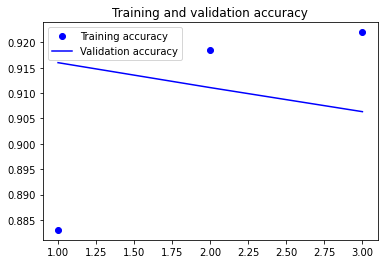

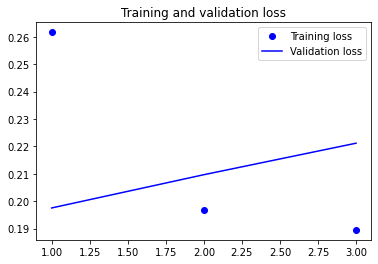

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
test_model = keras.models.load_model('smile_model')
test_loss, test_acc, test_prec, test_rec = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

1267/1267 [==============================] - 76s 60ms/step - loss: 0.1970 - accuracy: 0.9179 - precision: 0.9016 - recall: 0.9317
Test accuracy: 0.918


In [15]:
f1score = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print(f'Test F1 score: {f1score:.3f}')

Test F1 score: 0.916


This simple model achieves ~90% accuracy on the training and validation set in the very first epoch given the amount of data.
The optimal performance on the test set before overfitting is  0.918 accuracy and 0.916 F1 score